In [95]:
import numpy as np

def get_f1(element, keV):
    element_keV, element_f1 = np.loadtxt(f'{element}_f1').T
    return np.interp([keV],  element_keV, element_f1)[0]

def xray_scat_length(f1):
    return e**2 / (4 * pi * epsilon_0 * m_e * c**2) * f1

def Num_den(N,a):
    N / a**3


NV = {
    'NiAl2O4': (56 / 521.157e-30),
    'NiO': (8 / 72.9e-30), 
    'Al2O3': (20 / 251.4399e-30),
}


{'NiAl2O4': 1.074532242683107e+29,
 'NiO': 1.0973936899862826e+29,
 'Al2O3': 7.954187064185119e+28}

In [96]:
from scipy.constants import e, h, epsilon_0, c, m_e, pi

Ag_keV = 22.162
# f1 = {}
# b = {}
# for element in ['Ni', 'O', 'Al']:
#     f1[element] = get_f1(element, Ag_keV)
# for key, val in f1.items():
#     b[key] = xray_scat_length(val)




# sigma = {}
# for key, val in b.items():
#     sigma[key] = val**2

# scale = {
#     'NiAl2O4': sigma['NiAl2O4'] * NV['NiAl2O4'],
#     'Al2O3': sigma['Al2O3'] * NV['Al2O3'],
#     'NiO': sigma['NiO'] * NV['NiO']
# }


In [97]:
import pandas as pd

df_element = pd.DataFrame({'element': ['Ni', 'O', 'Al']})
df_element['f1'] = [get_f1(el, Ag_keV)  for el in df_element.element]
df_element['b']  = [xray_scat_length(f1) for f1 in df_element.f1]
df_element['sigma'] = [b**2 for b in df_element.b]
df_element.index = df_element.element

df_element = df_element.drop('element', axis=1)

df_element.loc['Al', 'b']

3.6780729958630206e-14

In [98]:
df = pd.DataFrame({'element': ['Al2O3', 'NiAl2O4', 'NiO']})

df['b'] = [
    (2 * df_element.loc['Al', 'b'] + 3 * df_element.loc['O', 'b'])/5,
    (df_element.loc['Ni', 'b'] + df_element.loc['O', 'b'])/2,
    (df_element.loc['Ni', 'b'] + 2 * df_element.loc['Al', 'b'] + 4 *df_element.loc['O', 'b'])/7
]
df['sigma'] = [b**2 for b in df.b]
df['NV'] = [ (20 / 251.4399e-30),(8 / 72.9e-30),(56 / 521.157e-30)]

df['scale'] = df.NV * df.sigma

df.index = df.element

df = df.drop('element', axis=1)


df

,b,sigma,NV,scale
element,,,,
Al2O3,2.825467e-14,7.983264e-28,7.954187e+28,63.500377
NiAl2O4,5.128963e-14,2.630626e-27,1.097394e+29,288.683273
NiO,3.483609e-14,1.213553e-27,1.074532e+29,130.400188


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob as glob

path = './res_scale_restraints/'

index_order = {
    'SBa200-U-10_1' : 10,
    'SBa200-U-2_5_1' : 2.5,
    'SBa200_U_30_test1': 30,
    'SBa200-U-7_5_1' :7.5,
    'SBa200-U-5_1' : 5,
    'UDOnfd2_acc_r01': 20,
    }


data_file_paths = (
    set(glob(f'{path}/*/*sheet*.res')) 
    - set(glob(f'{path}/*/*spherical*.res')) 
    - set(glob(f'{path}/*/*alox*.res'))
    - set(glob(f'{path}/*0*/0*.res'))
)



data = {'NiO_scale': [], 'NiAl2O4_scale': [], 'Tetr_Al2O3_scale': []}
for file in data_file_paths:
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        for key, val in data.items():   
            if line.startswith(key):
                val.append(float(line.split()[1]))

data_Delta = {'Delta_NiO_scale': [], 'Delta_NiAl2O4_scale': [], 'Delta_Tetr_Al2O3_scale': []}
for file in data_file_paths:
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        for key, val in data_Delta.items():   
            if line.startswith(key[len('Delta_'):]):
                val.append(float(line.split()[-1]))




index = [file.split('/')[2] for file in data_file_paths]


df_scale = pd.DataFrame(data)
df1["sum"] = df_scale.sum(axis=1)
#df = (df.loc[:,df.columns != 'sum'].T / df["sum"]).T
df_scale.index = index
df1['order'] = 0

for key, val in index_order.items():
    df1.loc[key, 'order'] = val


df1 = df1.sort_values('order')

df1_err = pd.DataFrame(data_Delta)
df1_err["sum"] = df1_err.sum(axis=1)
df1_err.index = index


df1= pd.concat([df1, df1_err], axis=1)
df1

,NiO_scale,NiAl2O4_scale,Tetr_Al2O3_scale,sum,order,Delta_NiO_scale,Delta_NiAl2O4_scale,Delta_Tetr_Al2O3_scale,sum,Delta_NiO_scale,...,Delta_Tetr_Al2O3_scale,sum,Delta_NiO_scale,Delta_NiAl2O4_scale,Delta_Tetr_Al2O3_scale,sum,Delta_NiO_scale,Delta_NiAl2O4_scale,Delta_Tetr_Al2O3_scale,sum
SBa200-U-2_5_1,0.030845,0.373832,0.401100,NaN,2.5,0.033170,0.058758,0.041436,NaN,0.033170,...,0.041436,NaN,0.033170,0.058758,0.041436,NaN,0.033170,0.058758,0.041436,0.133363
SBa200-U-5_1,0.016266,0.316593,0.383707,NaN,5.0,0.025060,0.057212,0.041173,NaN,0.025060,...,0.041173,NaN,0.025060,0.057212,0.041173,NaN,0.025060,0.057212,0.041173,0.123444
SBa200-U-7_5_1,0.155799,0.338418,0.436066,NaN,7.5,0.032581,0.085824,0.039547,NaN,0.032581,...,0.039547,NaN,0.032581,0.085824,0.039547,NaN,0.032581,0.085824,0.039547,0.157952
SBa200-U-10_1,0.152922,0.443863,0.307937,NaN,10.0,0.042929,0.072336,0.044230,NaN,0.042929,...,0.044230,NaN,0.042929,0.072336,0.044230,NaN,0.042929,0.072336,0.044230,0.159495
UDOnfd2_acc_r01,0.314284,0.232173,0.499481,NaN,20.0,0.033318,0.083528,0.044345,NaN,0.033318,...,0.044345,NaN,0.033318,0.083528,0.044345,NaN,0.033318,0.083528,0.044345,0.161191
SBa200_U_30_test1,0.451950,0.118460,0.354226,NaN,30.0,0.032785,0.043790,0.039381,NaN,0.032785,...,0.039381,NaN,0.032785,0.043790,0.039381,NaN,0.032785,0.043790,0.039381,0.115956


In [100]:
# df2 = pd.DataFrame({'element': ['Al2O3', 'NiAl2O4', 'NiO']})

# {
#    'Al2O3': df1['Tetr_Al2O3_scale'] /df.loc['Al2O3', 'scale'],
#     'NiAl2O4': df1['NiAl2O4_scale'] / df.loc['NiAl2O4', 'scale'],
#     'NiO' : df1['NiO_scale'] / df.loc['NiO', 'scale']
# }


df_scale = pd.DataFrame({'Al2O3': (df1['Tetr_Al2O3_scale'] / df.loc['Al2O3', 'scale']).to_numpy(),
'NiAl2O4': (df1['NiAl2O4_scale'] / df.loc['NiAl2O4', 'scale']).to_numpy(),
'NiO': (df1['NiO_scale'] / df.loc['NiO', 'scale']).to_numpy()})



df_scale["sum"] = df_scale.sum(axis=1)
# df_scale = (df_scale.loc[:,df_scale.columns != 'sum'].T / df_scale["sum"]).T
df_scale.index = index
df_scale['order'] = 0

for key, val in index_order.items():
    df_scale.loc[key, 'order'] = val


df_scale = df_scale.sort_values('order')



df_scale.index = df1.index
df_scale

df = df_scale
df


,Al2O3,NiAl2O4,NiO,sum,order
SBa200-U-2_5_1,0.006317,0.001295,0.000237,0.007848,2.5
SBa200-U-5_1,0.004849,0.001538,0.001173,0.007560,5.0
SBa200-U-7_5_1,0.007866,0.000804,0.002410,0.011080,7.5
SBa200-U-10_1,0.005578,0.000410,0.003466,0.009455,10.0
UDOnfd2_acc_r01,0.006043,0.001097,0.000125,0.007264,20.0
SBa200_U_30_test1,0.006867,0.001172,0.001195,0.009234,30.0


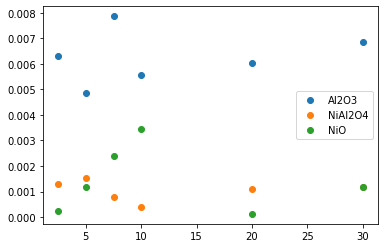

In [101]:
plt.scatter(df.order, df.Al2O3, label='Al2O3')
plt.scatter(df.order, df.NiAl2O4, label='NiAl2O4')
plt.scatter(df.order, df.NiO, label='NiO')

plt.legend()